In [52]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras import regularizers
import re

In [2]:
df = pd.read_csv('https://query.data.world/s/ggrxo26manda34gfmh7ya6p2a36iut')

In [194]:
data = df['content']
data = [re.sub(' +', ' ', re.sub('@', '', re.sub('@[^ ]+', '', re.sub('[?!#$,.\"_()/-:=\[\]]', ' ', d.lower())))).strip() for d in data]
data = np.array(data)
np.delete(data, 0, 0)
labels = pd.get_dummies(df['sentiment'])

In [252]:
labels

,anger,boredom,empty,enthusiasm,fun,happiness,hate,love,neutral,relief,sadness,surprise,worry
0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,1,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,0,0,0,1,0,0
9,0,0,0,0,0,0,0,0,0,0,1,0,0


In [4]:
df['sentiment'].value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

In [156]:
MAX_SENTENCE_LEN = 6

data2 = np.array([np.zeros(MAX_SENTENCE_LEN)], dtype=int)

for i in range(len(data)):
    sentence = data[i].split(' ')
    temp = []
    
    if i % 100 == 0:
        print(i/len(data))
    if len(sentence) > 1:
        for word in sentence[:MAX_SENTENCE_LEN]:
            temp.append(e.get_loc(word))
    
    #print(temp)
    #print(data2)
    data2 = np.vstack([data2, np.pad(temp, (0, MAX_SENTENCE_LEN-len(temp)), 'constant', constant_values=-1)])

0.0
0.0025
0.005
0.0075
0.01
0.0125
0.015
0.0175
0.02
0.0225
0.025
0.0275
0.03
0.0325
0.035
0.0375
0.04
0.0425
0.045
0.0475
0.05
0.0525
0.055
0.0575
0.06
0.0625
0.065
0.0675
0.07
0.0725
0.075
0.0775
0.08
0.0825
0.085
0.0875
0.09
0.0925
0.095
0.0975
0.1
0.1025
0.105
0.1075
0.11
0.1125
0.115
0.1175
0.12
0.1225
0.125
0.1275
0.13
0.1325
0.135
0.1375
0.14
0.1425
0.145
0.1475
0.15
0.1525
0.155
0.1575
0.16
0.1625
0.165
0.1675
0.17
0.1725
0.175
0.1775
0.18
0.1825
0.185
0.1875
0.19
0.1925
0.195
0.1975
0.2
0.2025
0.205
0.2075
0.21
0.2125
0.215
0.2175
0.22
0.2225
0.225
0.2275
0.23
0.2325
0.235
0.2375
0.24
0.2425
0.245
0.2475
0.25
0.2525
0.255
0.2575
0.26
0.2625
0.265
0.2675
0.27
0.2725
0.275
0.2775
0.28
0.2825
0.285
0.2875
0.29
0.2925
0.295
0.2975
0.3
0.3025
0.305
0.3075
0.31
0.3125
0.315
0.3175
0.32
0.3225
0.325
0.3275
0.33
0.3325
0.335
0.3375
0.34
0.3425
0.345
0.3475
0.35
0.3525
0.355
0.3575
0.36
0.3625
0.365
0.3675
0.37
0.3725
0.375
0.3775
0.38
0.3825
0.385
0.3875
0.39
0.3925
0.395
0.3975
0.4


In [157]:
data2 = np.delete(data2, 0, 0)
len(data2)

40000

In [158]:
data2[data2>64] = 64

In [159]:
df2 = pd.DataFrame(data2)

In [167]:
db = pd.DataFrame(np.transpose([np.arange(-1, 64)] * MAX_SENTENCE_LEN))
db = db.append(df2)

df3 = pd.concat([pd.get_dummies(db[col]) for col in db], axis=1)
df3 = df3.iloc[65:]

In [227]:
df3

,-1.0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,...,55.0,56.0,57.0,58.0,59.0,60.0,61.0,62.0,63.0,64.0
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [173]:
mask = np.random.rand(len(df3)) < 0.8
train_data = df3[mask]
train_labels = labels[mask]
test_data = df3[~mask]
test_labels = labels[~mask]

In [174]:
train_data.shape

(32050, 396)

In [6]:
a = ' '.join(data).lower()
a = re.sub('[?!@#$,.\"_()/-:]', ' ', a)
b = a.split(' ')
b = list(filter(None, b))
c = pd.Series(b)
e = pd.DataFrame(c.value_counts().reset_index())
e = pd.Index(e['index'])

In [132]:
max_length = 0
for d in data:
    if len(d.split(' ')) > max_length:
        max_length = len(d.split(' '))

print(max_length)

33


In [228]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=396, kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(13, activation='sigmoid'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [229]:
batch_size = 100
epochs = 20

history = model.fit(train_data, train_labels, batch_size=batch_size, epochs=epochs, verbose=1, 
                   validation_data=(test_data, test_labels))

Train on 32050 samples, validate on 7950 samples
Epoch 1/20
32050/32050 [==============================] - 3s 81us/step - loss: 2.2983 - acc: 0.2067 - val_loss: 2.1553 - val_acc: 0.2094
Epoch 2/20
32050/32050 [==============================] - 2s 51us/step - loss: 2.1569 - acc: 0.2219 - val_loss: 2.1486 - val_acc: 0.2220
Epoch 3/20
32050/32050 [==============================] - 2s 51us/step - loss: 2.1496 - acc: 0.2279 - val_loss: 2.1440 - val_acc: 0.2438
Epoch 4/20
32050/32050 [==============================] - 2s 51us/step - loss: 2.1444 - acc: 0.2362 - val_loss: 2.1337 - val_acc: 0.2538
Epoch 5/20
32050/32050 [==============================] - 2s 51us/step - loss: 2.1356 - acc: 0.2490 - val_loss: 2.1224 - val_acc: 0.2662
Epoch 6/20
32050/32050 [==============================] - 2s 51us/step - loss: 2.1296 - acc: 0.2547 - val_loss: 2.1199 - val_acc: 0.2638
Epoch 7/20
32050/32050 [==============================] - 2s 51us/step - loss: 2.1257 - acc: 0.2593 - val_loss: 2.1179 - val_acc:

Text(0.5,1,'Accuracy Curves')

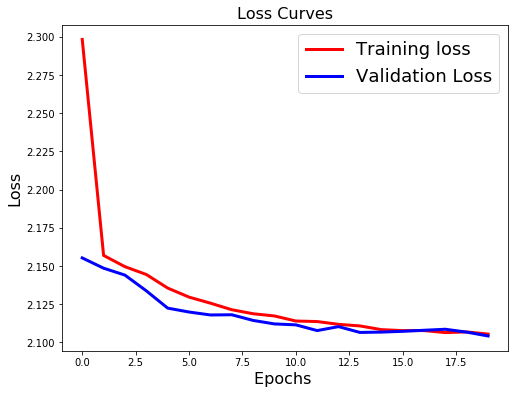

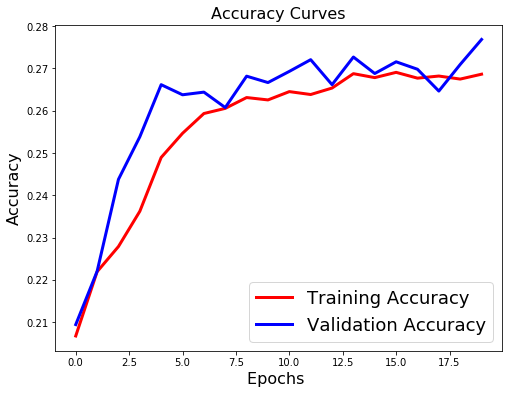

In [230]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [262]:
arr3['a'] = 0
arr3['b'] = 0
arr3['c'] = 0
arr3['d'] = 0
arr3['e'] = 0
arr3['f'] = 0

In [259]:
st = 'i hope you return home safely'

splt = st.split('\n')
arr = []
for word in sentence[:MAX_SENTENCE_LEN]:
    arr.append(e.get_loc(word))


arr = np.pad(arr, (0, MAX_SENTENCE_LEN-len(arr)), 'constant', constant_values=-1)
arr[arr>64] = 64

arr = np.array([arr])
arr2 = pd.DataFrame(arr)

In [260]:
db = pd.DataFrame(np.transpose([np.arange(-1, 64)] * MAX_SENTENCE_LEN))
db.append(arr2)

arr3 = pd.concat([pd.get_dummies(db[col]) for col in db], axis=1)
arr3 = arr3.iloc[[0]]

In [263]:
labels.columns[np.argmax(model.predict(arr3))]

'worry'